A los efectos de realizar el siguiente EDA, se estudio cuales son los principales indicadores del mercado de criptomonedas capitalizacion, volumen y tecnología

* Capitalizacion de mercado - el precio por el total de circulacion
* Volumen de operaciones - volumen es la suma de todas las transacciones realizadas en un día
* Tecnologia 

In [43]:
# Importamos las librerías necesarias

from pycoingecko import CoinGeckoAPI
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz
import json

In [44]:
# Instanciamos la API Coingecko, y realizamos una consulta para ver la situación del mercado en este momento
# Tenemos en cuenta esta consulta, que es la que nos trae el market_cap y volumen de la cripto

cg = CoinGeckoAPI()
all_coins_market = cg.get_coins_markets(vs_currency ='usd')
all_coins_market_df = pd.DataFrame(all_coins_market)
pd.set_option('display.max_columns', None)
all_coins_market_df.sort_values(by='market_cap',ascending=False).head(5)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26348.000000,513423330293,1,5.538784e+11,1.669958e+10,26668.000000,25816.000000,304.760000,1.17023,5.752093e+09,1.13304,1.946617e+07,2.100000e+07,2.100000e+07,69045.00,-61.76476,2021-11-10T14:24:11.849Z,67.810000,38832.04483,2013-07-06T00:00:00.000Z,None,2023-08-24T01:57:37.143Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1672.630000,201207997257,2,2.012080e+11,1.061668e+10,1689.230000,1631.050000,38.580000,2.36091,4.450046e+09,2.26169,1.202143e+08,1.202143e+08,NaN,4878.26,-65.66106,2021-11-10T14:24:19.604Z,0.432979,386787.95416,2015-10-20T00:00:00.000Z,"{'times': 83.83683001527844, 'currency': 'btc'...",2023-08-24T01:57:32.941Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.001000,82870605608,3,8.287061e+10,2.077444e+10,1.004000,0.996029,0.001458,0.14590,3.971847e+07,0.04795,8.284578e+10,8.284578e+10,NaN,1.32,-24.43008,2018-07-24T00:00:00.000Z,0.572521,74.64198,2015-03-02T00:00:00.000Z,None,2023-08-24T01:55:00.400Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,216.080000,33261690487,4,4.323739e+10,5.542922e+08,218.010000,212.360000,2.220000,1.03583,3.077476e+08,0.93387,1.538562e+08,1.538562e+08,2.000000e+08,686.31,-68.50682,2021-05-10T07:24:17.097Z,0.039818,542723.44219,2017-10-19T00:00:00.000Z,None,2023-08-24T01:57:34.776Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.526808,27885509875,5,5.269949e+10,9.422019e+08,0.534396,0.516330,0.006514,1.25198,3.436689e+08,1.24781,5.291419e+10,9.998849e+10,1.000000e+11,3.40,-84.48419,2018-01-07T00:00:00.000Z,0.002686,19529.79800,2014-05-22T00:00:00.000Z,None,2023-08-24T01:57:36.027Z


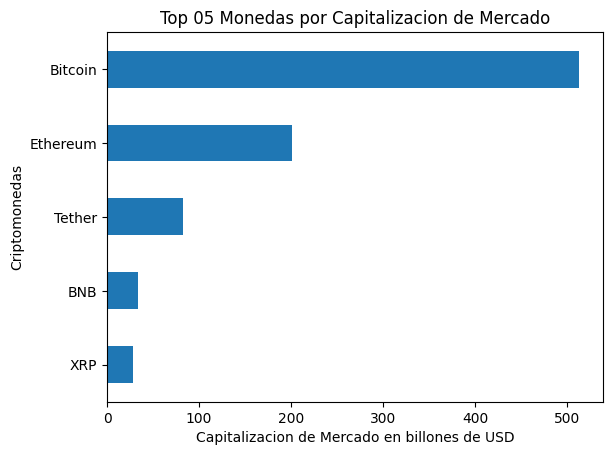

In [45]:
# A los fines de una mejor visualizacion creamos una columna 'market billon' 
# Esto es a los fines de poder apreciar mejor el grafico de barras

data = all_coins_market_df.sort_values(by='market_cap',ascending=False).head(5)
data['market_billon'] = data['market_cap'] / 1000000000

ax = data.groupby(['name'])['market_billon'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Capitalizacion de Mercado en billones de USD");
ax.set_ylabel("Criptomonedas");
plt.title("Top 05 Monedas por Capitalizacion de Mercado");

Aqui se pueden ver las 5 monedas con mayor capitalizacion del mercado, por ende las mas 'estables', elegimos estas a los efectos de analizar en este EDA. 
Elegimos: bitcoin, ethereum, tether, binancecoin, ripple

Ahora para elegir las otras 5 criptomonedas realizare un indice en el que comparamos el volumen de transacciones sobre la capitalizacion de mercado

**Índice de Volumen de Transacciones a Capitalización de Mercado = Volumen de Transacciones de 24 horas / Capitalización de Mercado**

El resultado de este cálculo nos proporciona una idea de cuánto volumen de transacciones se está negociando en relación con el tamaño total del mercado de una criptomoneda. Un índice alto puede indicar una mayor actividad comercial y posiblemente un mayor interés en la moneda al momento de la consulta.



In [46]:
monedas2 = cg.get_coins_markets(vs_currency='usd')

In [47]:
monedas2 = pd.DataFrame(monedas2)
monedas2['volumen/capitalizacion'] = monedas2['total_volume']/monedas2['market_cap']

In [52]:
df = monedas2.sort_values(by='volumen/capitalizacion', ascending=False)
df = df[['id','market_cap','total_volume','volumen/capitalizacion']].head(10)
df.head(5)

,id,market_cap,total_volume,volumen/capitalizacion
73,gala,508697696,4.708803e+08,0.925658
25,true-usd,2742322538,2.200042e+09,0.802255
24,binance-usd,3183199412,2.526941e+09,0.793837
88,sui,442293722,2.191440e+08,0.495472
2,tether,82870605608,2.077444e+10,0.250685


Aqui podemos ver las 5 monedas con mayor indice, las cuales estan teniendo mucho volumen de transacciones en comparación de su marketcap

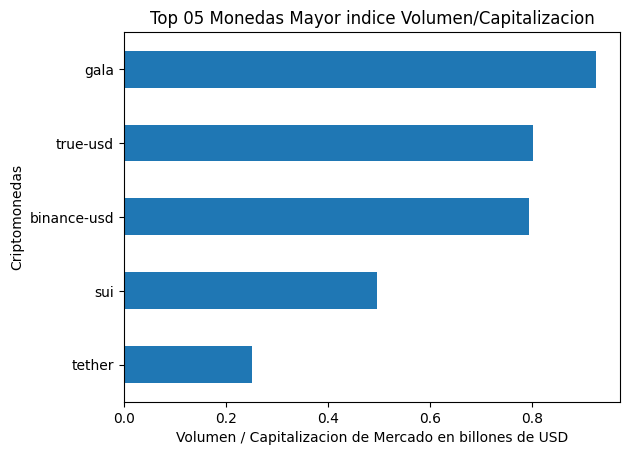

In [55]:
# Graficamos un grafico de barras

ax = df.groupby(['id'])['volumen/capitalizacion'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh');
ax.set_xlabel("Volumen / Capitalizacion de Mercado en billones de USD");
ax.set_ylabel("Criptomonedas");

plt.title("Top 05 Monedas Mayor indice Volumen/Capitalizacion");

Las monedas obtenidas al momento de la consulta son : 'gala','true-usd','sui','binance-usd','thorchain'

Las cuales usare para realizar un analisis del mercado, a los fines de tener algunas menos estables

In [50]:
# almacenamos las monedas elegidas en una lista
monedas = ['bitcoin','ethereum','tether','binancecoin','ripple','gala','true-usd','sui','binance-usd','thorchain']

In [51]:
# Vamos a crear un dataframe con todas las monedas elegidas
import datetime as dt
import pandas as pd
from pycoingecko import CoinGeckoAPI

dataframes = []

# Recorrer la lista de monedas
for coin in monedas:
    # Obtener los datos OHLC para la moneda
    ohlcData = cg.get_coin_ohlc_by_id(id=coin, vs_currency='usd', days='365')

    # Crear un DataFrame a partir de los datos OHLC ,High,Low,Close,Moneda
    ohlcDataFrame = pd.DataFrame(data=ohlcData, columns=['Fecha', 'Open', 'High', 'Low', 'Close'])

    # Reformatear la fecha
    ohlcDataFrame['Fecha'] = ohlcDataFrame['Fecha'].apply(lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y %H:%M:%S'))

    # Establecer el índice como la fecha
    ohlcDataFrame = ohlcDataFrame.set_index('Fecha')

    # Agregar el nombre de la moneda al DataFrame
    ohlcDataFrame['Moneda'] = coin

    # Agregar el DataFrame a la lista
    dataframes.append(ohlcDataFrame)

# Concatenar todos los DataFrames en un solo DataFrame
final_df = pd.concat(dataframes)

# Guardar el DataFrame concatenado en un archivo CSV
final_df.to_csv('datos_cripto.csv')


In [28]:
final_df.head()

,Fecha,Open,High,Low,Close,Moneda
0,08-26-2022 21:00:00,21395.00,21618.00,20271.00,20271.00,bitcoin
1,08-30-2022 21:00:00,20070.00,20309.00,19659.25,19805.35,bitcoin
2,09-02-2022 21:00:00,20024.00,20154.00,19941.45,19941.45,bitcoin
3,09-06-2022 21:00:00,19814.56,19980.01,18859.50,18859.50,bitcoin
4,09-10-2022 21:00:00,19280.63,21707.00,19280.63,21707.00,bitcoin


### Analizamos el DataFrame

In [22]:
# Analizamos el DataFrame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   895 non-null    object 
 1   Open    895 non-null    float64
 2   High    895 non-null    float64
 3   Low     895 non-null    float64
 4   Close   895 non-null    float64
 5   Moneda  895 non-null    object 
dtypes: float64(4), object(2)
memory usage: 42.1+ KB


In [23]:
# Analizamos si tiene valores nulos 
final_df.isnull().sum()

Fecha     0
Open      0
High      0
Low       0
Close     0
Moneda    0
dtype: int64

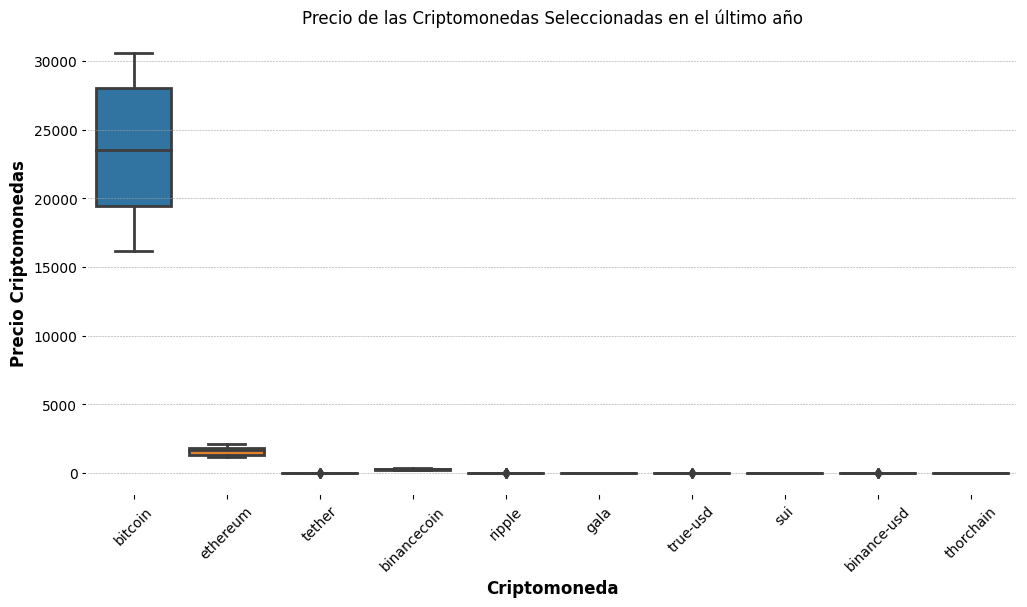

In [27]:
#Chequeamos outliers
# Filtrar el DataFrame para las criptomonedas seleccionadas (si es necesario)
monedas = ['bitcoin','ethereum','tether','binancecoin','ripple','gala','true-usd','sui','binance-usd','thorchain']
df_seleccionado = final_df[final_df['Moneda'].isin(monedas)]

# Crear el gráfico de boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_seleccionado, x='Moneda', y='Close')
plt.title('Precio de las Criptomonedas Seleccionadas en el último año')
plt.xlabel('Criptomoneda')
plt.ylabel('Precio Criptomonedas')
plt.xticks(rotation=45)
plt.show()

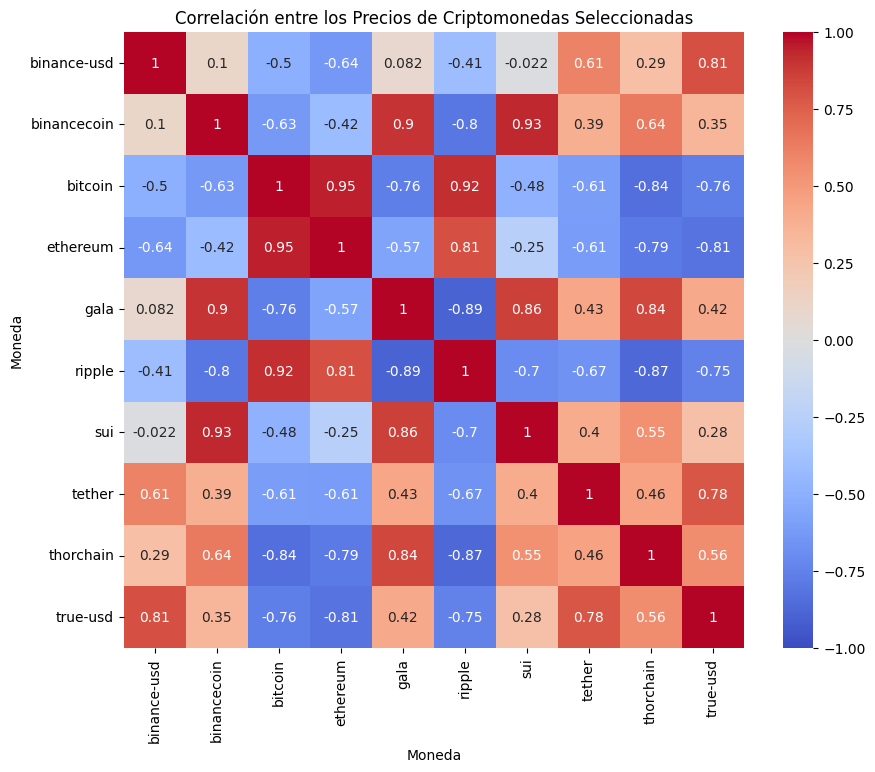

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un gráfico de calor, para la correlación de las monedas respecto de su precio en el tiempo

correlation_matrix2 = final_df.pivot_table(index='Fecha', columns='Moneda', values='Close').corr()

plt.figure(figsize=(10, 8))

sns.heatmap(data=correlation_matrix2.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlación entre los Precios de Criptomonedas Seleccionadas')

plt.show()


En este gráfico de correlación se puede observar interrelaciones entre los precios de diversas monedas seleccionadas.
Se destaca que cuanto más cercana a uno es la correlación positiva entre dos monedas, más sólida es su relación aparente. Sin embargo, es importante señalar que la correlación no implica causalidad; aunque se puede intuir una relación, esta no necesariamente indica una conexión causal directa.

Un ejemplo notable es la alta correlación existente entre Bitcoin y Ethereum, así como entre Bitcoin y Ripple. Esto sugiere una relación fuerte entre estos pares de monedas. Además, se observan correlaciones más débiles, como la correlación negativa entre Bitcoin y Gala, así como entre Bitcoin y Thorchain. Asimismo, destaca la relación fuerte entre Gala y Thorchain, dos monedas que presentan una correlación positiva significativa.

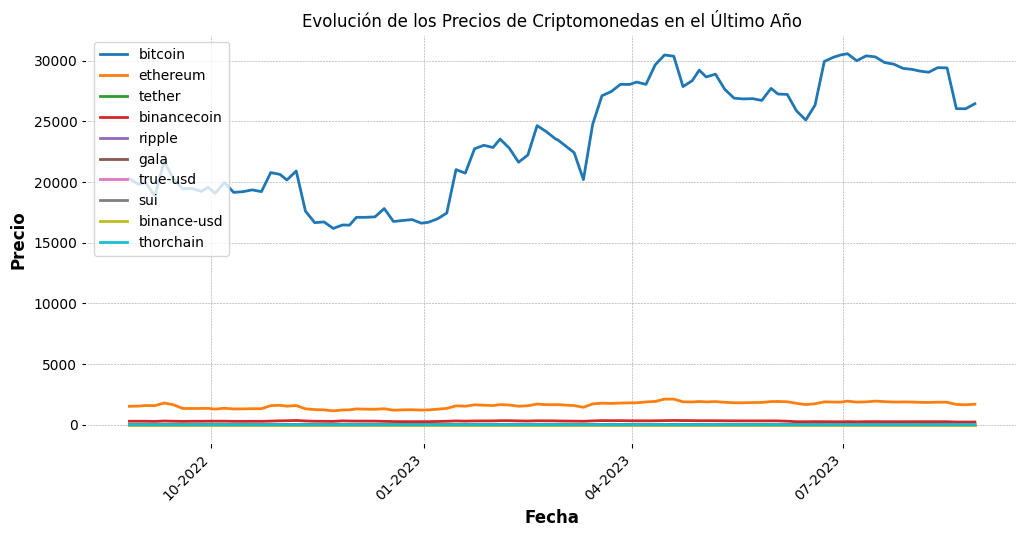

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd


data = pd.read_csv("datos_cripto.csv") # Cargamos el dataframe con el csv obtenido

data['Fecha'] = pd.to_datetime(data['Fecha'], format='%m-%d-%Y %H:%M:%S')

# Filtrar datos para el último año

last_year_data = data[data['Fecha'] >= data['Fecha'].max() - pd.DateOffset(years=1)]

# Creamos un gráfico de línea temporal

plt.figure(figsize=(12, 6))
sns.lineplot(data=last_year_data, x='Fecha', y='Close', hue='Moneda')
plt.title('Evolución de los Precios de Criptomonedas en el Último Año')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(loc='upper left')

# Formatear el eje X para mostrar solo la fecha en formato mm-yyyy

date_locator = mdates.AutoDateLocator(minticks=3, maxticks=7) # Esto es para que no se nos llene el eje x de fechas
date_formatter = mdates.DateFormatter('%m-%Y')  # Formato mm-yyyy

plt.gca().xaxis.set_major_locator(date_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gcf().autofmt_xdate()

plt.xticks(rotation=45)
plt.show()


Aqui se puede ver la variacion durante el ultimo año del precio de Bitcoin, y demas criptos monedas viendo la variabilidad de la misma siendo que se movio dentro de un rango de 15000 a 30000 usds

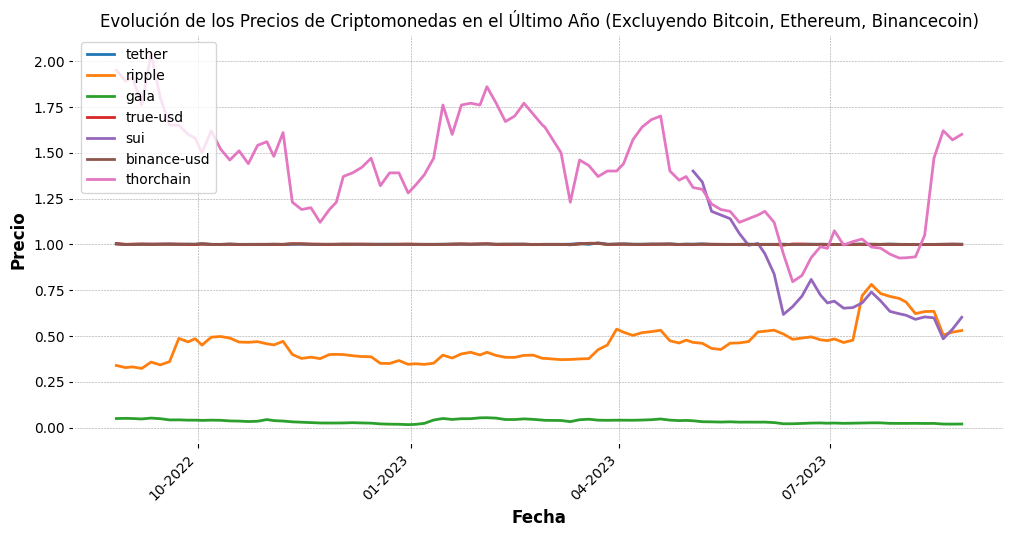

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

data = pd.read_csv("datos_cripto.csv")

data['Fecha'] = pd.to_datetime(data['Fecha'], format='%m-%d-%Y %H:%M:%S')

# Filtramos datos para el último año y excluir la moneda 'bitcoin'

last_year_data = data[(data['Fecha'] >= data['Fecha'].max() - pd.DateOffset(years=1)) & (data['Moneda'] != 'bitcoin') & (data['Moneda'] != 'ethereum')& (data['Moneda'] != 'binancecoin')]

# Creamos el gráfico de línea temporal

plt.figure(figsize=(12, 6))
sns.lineplot(data=last_year_data, x='Fecha', y='Close', hue='Moneda')
plt.title('Evolución de los Precios de Criptomonedas en el Último Año (Excluyendo Bitcoin, Ethereum, Binancecoin)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(loc='upper left')



date_locator = mdates.AutoDateLocator(minticks=3, maxticks=7)

date_formatter = mdates.DateFormatter('%m-%Y')  # Formato mm-yyyy

plt.gca().xaxis.set_major_locator(date_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gcf().autofmt_xdate()

plt.xticks(rotation=45)
plt.show()


A fines de mejorar la visualización de las monedas elegidas, se graficó sin tener en cuenta las monedas de mayor nominalidad.
Gracias a esto se puede apreciar que binance-usd se mantuvo estable durante todo el año como ser tambien ripple, a comparación del resto de monedas analizadas.

### Utilizaremos para analizar algunos KPIs de las monedas seleccionadas
Los KPI's elegidos son:

1. **RSI**: es un indicador técnico que mide la velocidad y cambio de los movimientos de precios en una criptomoneda. Nos indica cuando es cercano a 0.30 que esta en un buen momento de compra, y de 0.70 que esta sobrevendido por lo que no es un buen momento para invertir.

2. **ROI**: Calcula el porcentaje de ganancia o pérdida en relación con la inversión inicial.

3. **Media Móvil**: es un indicador técnico que ayuda a suavizar la variación de precios a lo largo del tiempo, lo que facilita la identificación de tendencias.

### Analizaremos **ripple**

### Graficamos el RSI

In [11]:
# Cargamos el Dataframe eligiendo solo la moneda ripple a los fines de su análisis

data = data[data['Moneda'] == 'ripple']

ohlc_data_frame = pd.DataFrame(data = data, columns = ['Fecha','Open', 'High' ,'Low', 'Close'])

ohlc_data_frame = ohlc_data_frame.reset_index(drop=True)
ohlc_data_frame = ohlc_data_frame.set_index('Fecha')

In [12]:
import numpy as np
# RSI indice de fuerza relativa

ohlc_data_frame['change'] = ohlc_data_frame['Close'].diff()

ohlc_data_frame['gain'] = ohlc_data_frame.change.mask(ohlc_data_frame.change < 0, 0.0)

ohlc_data_frame['loss'] = -ohlc_data_frame.change.mask(ohlc_data_frame.change > 0, -0.0)

# Creamos una función para la media movil
def rma(x, n):
    
    a = np.full_like(x, np.nan)
    a[n] = x[1:n+1].mean()
    for i in range(n+1, len(x)):
        a[i] = (a[i-1] * (n - 1) + x[i]) / n
    return a

ohlc_data_frame['avg_gain'] = rma(ohlc_data_frame.gain.to_numpy(), 14)
ohlc_data_frame['avg_loss'] = rma(ohlc_data_frame.loss.to_numpy(), 14)

ohlc_data_frame['rs'] = ohlc_data_frame.avg_gain / ohlc_data_frame.avg_loss
ohlc_data_frame['RSI'] = 100 - (100 / (1 + ohlc_data_frame.rs))
ohlc_data_frame = ohlc_data_frame.drop(['change', 'gain', 'loss', 'avg_gain', 'avg_loss', 'rs'], axis=1)

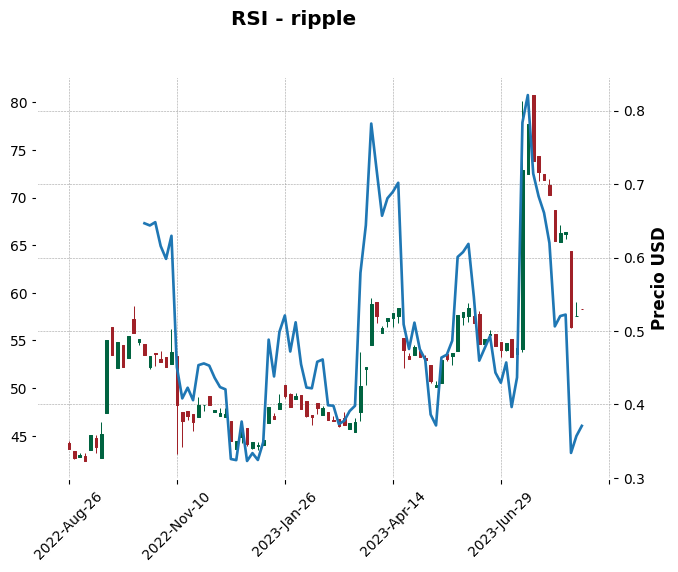

In [17]:
import mplfinance as fplt # Esta libreria esta diseñada para graficar información financiera, excelente para graficos de vela.

# Graficamos

rsi = fplt.make_addplot(ohlc_data_frame["RSI"])


fplt.plot(  ohlc_data_frame,
            type='candle',
            addplot = rsi,
            style='charles',
            title='RSI - ripple',
            ylabel='Precio USD',
            )

Se puede observar en el gráfico de velas tendencia bajista despues de un pico de alza a mediados de enero del 2023.
El indice del RSI no indica que sea un momento de compra, siendo muy bajo para llegar a una conclusión.

### Vamos a graficar el ROI

In [14]:
# ROI 

import pandas as pd

# Datos de ejemplo: Fechas, inversión inicial y valor de la inversión en diferentes momentos
fechas = pd.to_datetime(ohlc_data_frame.index)
inversion_inicial = ohlc_data_frame['Close'].iloc[0]
valor_inversion = ohlc_data_frame['Close']

# Crear un DataFrame de pandas con los datos
data = {'Fecha': fechas, 'Valor_Inversion': valor_inversion}
df = pd.DataFrame(data)
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Calcular el ROI
df['ROI'] = (df['Valor_Inversion'] - inversion_inicial) / inversion_inicial * 100

# Chequeamos como nos quedo el indice
df.head()

,Fecha,Valor_Inversion,ROI
Fecha,,,
2022-08-26 21:00:00,2022-08-26 21:00:00,0.339201,0.000000
2022-08-30 21:00:00,2022-08-30 21:00:00,0.327558,-3.432478
2022-09-02 21:00:00,2022-09-02 21:00:00,0.331388,-2.303354
2022-09-06 21:00:00,2022-09-06 21:00:00,0.322883,-4.810717
2022-09-10 21:00:00,2022-09-10 21:00:00,0.357632,5.433651


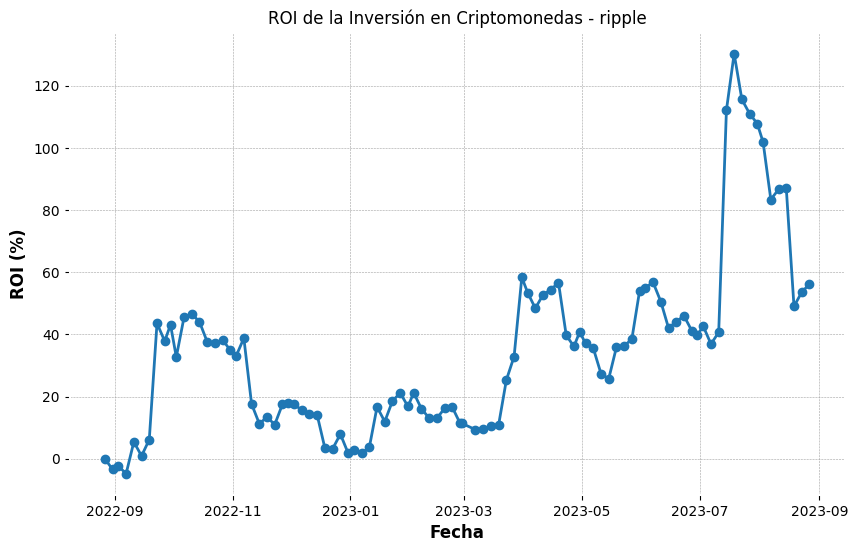

In [19]:
import matplotlib.pyplot as plt

# Se crea el gráfico de ROI
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['ROI'], marker='o')
plt.title('ROI de la Inversión en Criptomonedas - ripple')
plt.xlabel('Fecha')
plt.ylabel('ROI (%)')
plt.grid(True)
plt.show()

Hay que tener en cuenta antes de analizar este grafico que la fecha inicial es el punto de partida del indice, siendo que en el valor de la inversion usamos el supuesto que se compro una moneda.- 

Siguiendo este supuesto, se puede ver que si compramos durante el mes de agosto de 2022 a comparacion de la fecha de hoy el precio subio casi un 60% por lo que el indice es positivo, por lo que este indice depende mucho de donde nos paremos con la inversión inicial.

### Graficamos la Media Movil

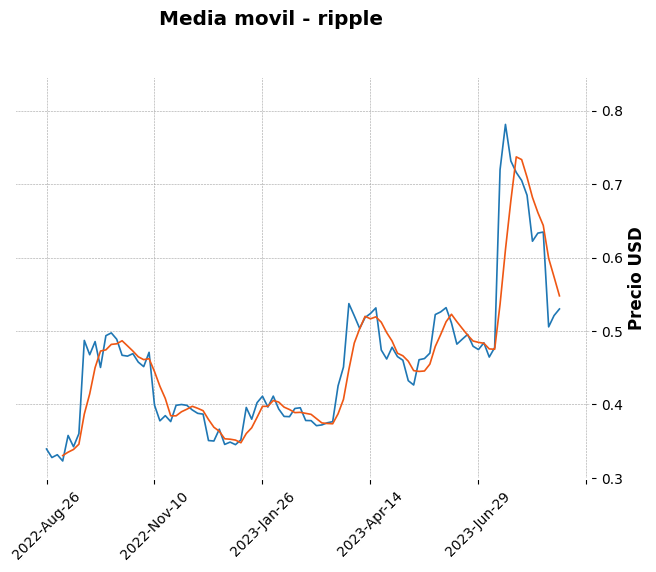

In [18]:
# Media Movil 

fplt.plot(  ohlc_data_frame,
            type='line',
            mav=4,
            style='charles',
            title='Media movil - ripple',
            ylabel='Precio USD',
            )

De este grafico se puede observar la oscilaciones de los precios de esta moneda en tan solo un año. Siendo que tuvo picos de precio en octubre del 2023 y junio del 2023 desde ahi una tendencia bajista hasta los dias de la consulta.

Como conclusion podemos decir que esta moneda esta sujeta a grandes variaciones en su precio, siendo opciones interesantes para invertir a muy corto plazo, por lo que siempre hay que estar monitoreando y estudiando estos tipos de inversiones antes de incurrir en este mundo. 